In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import collections

%reload_ext lab_black

# Diameter of the graph

In [2]:
actors_agg_adj = np.load("sparse_agg_actor_adj.npy")
actors_graph = nx.from_numpy_matrix(actors_agg_adj)

In [3]:
print(f"The diameter of the graph is: {nx.diameter(actors_graph)}")

The diameter of the graph is: 4


# Sparsity of the graph

#### HeatMap

In [4]:
# sns.heatmap(actors_agg_adj)

### Sparsity 

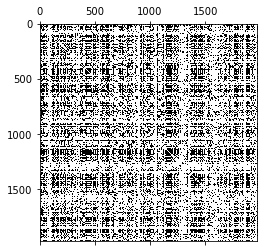

In [5]:
plt.spy(actors_agg_adj)

# Connected components

In [6]:
connected_components = nx.number_connected_components(actors_graph)
connected_components

1

# Degree Distribution

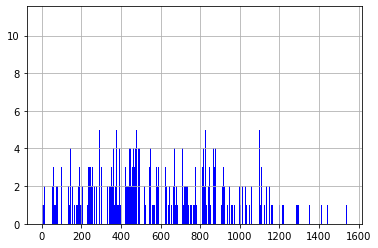

In [7]:
degree_sequence = sorted(
    [d for n, d in actors_graph.degree()], reverse=True
)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
# plt.ylim([0, 10])
plt.grid(True)

# Spectrum

In [8]:
lamb_comb = nx.laplacian_spectrum(actors_graph)
lamb_norm = nx.normalized_laplacian_spectrum(actors_graph)

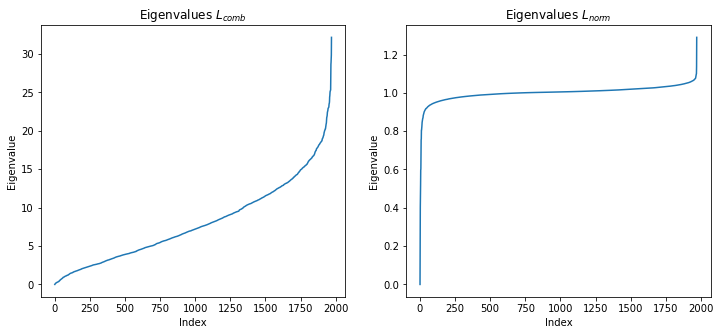

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(lamb_comb)
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{comb}$")
plt.subplot(122)
plt.plot(lamb_norm)
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{norm}$")
plt.show()

# Average Degree

In [10]:
average_degree = nx.average_degree_connectivity(actors_graph)
# average_degree
dict(list(average_degree.items())[0:10])

{476: 756.3681722689075,
 605: 789.1095041322315,
 744: 814.9112903225806,
 518: 736.3552123552123,
 751: 843.2330226364846,
 315: 547.2031746031746,
 448: 714.0602678571429,
 485: 797.2030927835051,
 891: 795.5274971941639,
 450: 703.9746031746032}

# Plot the Graph

C:\Users\AndresMontero\.conda\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


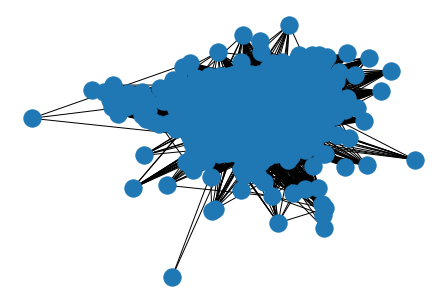

In [11]:
nx.draw(actors_graph)

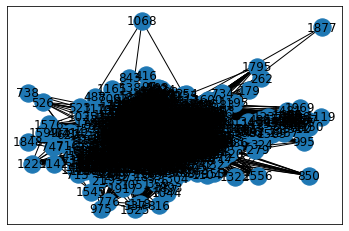

In [12]:
nx.draw_networkx(actors_graph)

In [13]:
# # Graph-tool
# g = Graph()
# g.add_edge_list(np.transpose(actors_agg_adj[100:200, 100:200].nonzero()))

In [14]:
# gt.draw.graph_draw(g, fmt="png", output_size=(600, 600))

In [15]:
Gc_actors = max(nx.connected_component_subgraphs(actors_graph), key=len)
nb_edges_gc = Gc_actors.number_of_edges()
nb_nodes_gc = Gc_actors.number_of_nodes()
coords_Gc = nx.spring_layout(Gc_actors, k=0.03)

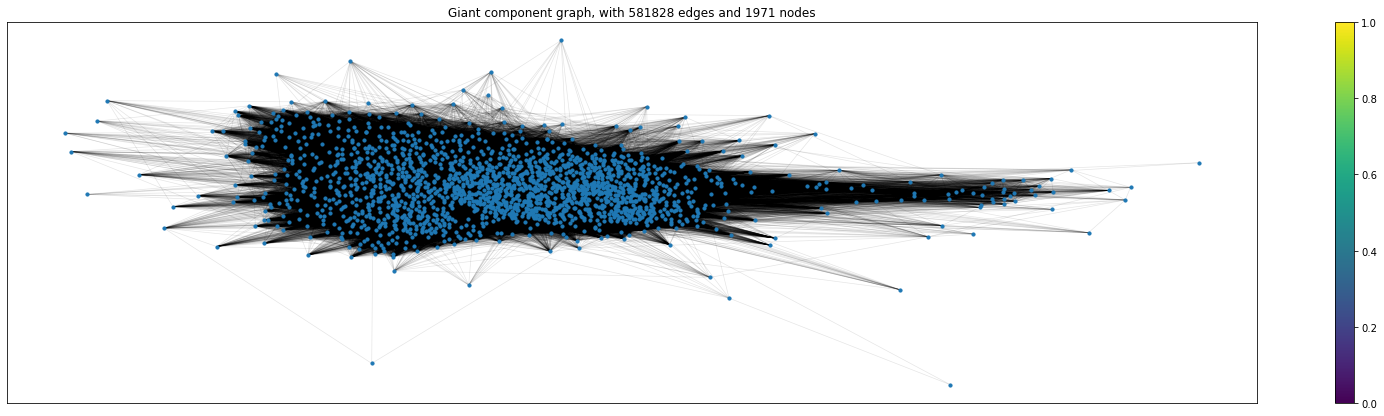

In [16]:
plt.figure(figsize=(28, 7))
im = nx.draw_networkx_nodes(
    Gc_actors, coords_Gc, node_size=10, cmap="tab20", vmin=0, vmax=20
)
nx.draw_networkx_edges(Gc_actors, coords_Gc, alpha=0.1, width=0.7)
plt.title(
    "Giant component graph, with {} edges and {} nodes".format(nb_edges_gc, nb_nodes_gc)
)
plt.colorbar(im)